In [103]:
%run DMD_functions.ipynb

In [104]:
mat = scipy.io.loadmat('CYLINDER_ALL.mat')
print(mat.keys())
u=mat['UALL']
v=mat['VALL']
vort=mat['VORTALL']

del mat

nx=199; ny=449

dict_keys(['__header__', '__version__', '__globals__', 'UALL', 'UEXTRA', 'VALL', 'VEXTRA', 'VORTALL', 'VORTEXTRA', 'm', 'n', 'nx', 'ny'])


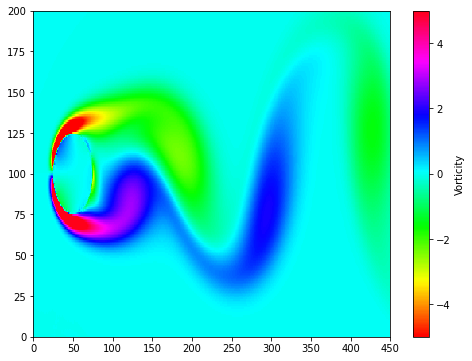

In [105]:
koji=19

vort1=vort[:,koji]

vort1 = np.clip(vort1, -5,5)

fig, ax = plt.subplots(figsize=(8, 6))
y_os = np.linspace(0,200,200)
x_os = np.linspace(0,450,450)

c = ax.pcolormesh(x_os, y_os, vort1.reshape((-1,199)).T, cmap='hsv')
fig.colorbar(c, ax=ax, label='Vorticity')



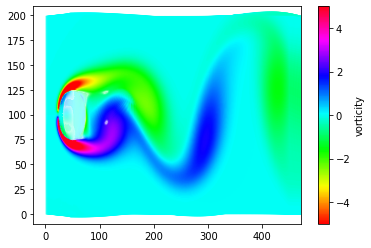

In [106]:
#quiver plot sa brzinama...

plt.figure()
x_os_2=np.repeat(x_os[:-1], 199); y_os_2=np.tile(y_os[:-1], 449)
q = plt.quiver(x_os_2, y_os_2, u[:,koji], v[:,koji], vort1, cmap='hsv', scale=10)
q.set_clim(-5, 5)
cb = plt.colorbar(q)
cb.set_label('vorticity')
plt.show()

In [107]:
N=vort.shape[1]-1
Z_v, L_v = DMD(vort[:,:N], vort[:,1:N+1], k=44)
print(L_v)

[ 1.        +0.j          0.97847826+0.20634992j  0.97847826-0.20634992j
  0.91483942+0.40381782j  0.91483942-0.40381782j  0.81182272+0.583904j
  0.81182272-0.583904j    0.67386234+0.73885692j  0.67386234-0.73885692j
  0.50689658+0.86200688j  0.50689658-0.86200688j  0.31811224+0.94805306j
  0.31811224-0.94805306j  0.11563526+0.99329175j  0.11563526-0.99329175j
 -0.0918191 +0.99577571j -0.0918191 -0.99577571j -0.29532123+0.95539802j
 -0.29532123-0.95539802j -0.07062304+0.j         -0.33248065+0.9300991j
 -0.33248065-0.9300991j  -0.48611168+0.87389668j -0.48611168-0.87389668j
 -0.5227473 +0.8498549j  -0.5227473 -0.8498549j  -0.65597819+0.75477995j
 -0.65597819-0.75477995j -0.69125121+0.72245817j -0.69125121-0.72245817j
 -0.79760924+0.60317487j -0.79760924-0.60317487j -0.99971399+0.02394209j
 -0.99971399-0.02394209j -0.9732571 +0.22971783j -0.9732571 -0.22971783j
 -0.98313642+0.1828578j  -0.98313642-0.1828578j  -0.90490854+0.42560687j
 -0.90490854-0.42560687j -0.92423231+0.38178564j -0.92

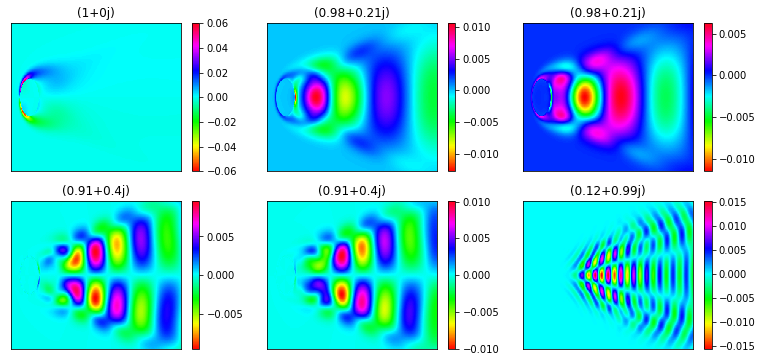

In [108]:
fig, axs = plt.subplots(2, 3, figsize=(13, 6))
koji_z=[0, 1, 1, 3, 3, 13]
for i in range(6):
    if(i not in [2,4]):
        c=axs[i//3,i%3].pcolormesh(x_os[:-1], y_os[:-1], np.real(Z_v[:,koji_z[i]]).reshape((-1,199)).T, cmap='hsv')
    else:
        c=axs[i//3,i%3].pcolormesh(x_os[:-1], y_os[:-1], np.imag(Z_v[:,koji_z[i]]).reshape((-1,199)).T, cmap='hsv')
    plt.colorbar(c, ax=axs[i//3, i%3], orientation='vertical')
    axs[i//3,i%3].set_xticks([])
    axs[i//3,i%3].set_yticks([])
    axs[i//3, i%3].set_title(np.around(L_v[koji_z[i]],2))
plt.show()

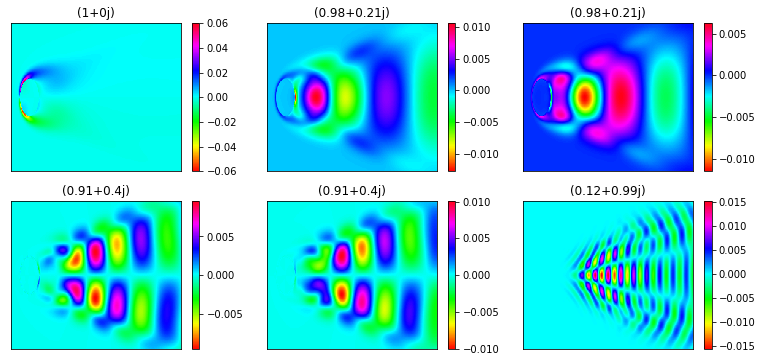

In [109]:
Z_v_ex, L_v_ex= DMD_exact(vort[:,:N], vort[:,1:N+1], k=44)
#print(L_v)
fig, axs = plt.subplots(2, 3, figsize=(13, 6))
koji_z=[0, 1, 1, 3, 3, 13]
for i in range(6):
    if(i not in [2,4]):
        c=axs[i//3,i%3].pcolormesh(x_os[:-1], y_os[:-1], np.real(Z_v_ex[:,koji_z[i]]).reshape((-1,199)).T, cmap='hsv')
    else:
        c=axs[i//3,i%3].pcolormesh(x_os[:-1], y_os[:-1], np.imag(Z_v_ex[:,koji_z[i]]).reshape((-1,199)).T, cmap='hsv')
    plt.colorbar(c, ax=axs[i//3, i%3], orientation='vertical')
    axs[i//3,i%3].set_xticks([])
    axs[i//3,i%3].set_yticks([])
    axs[i//3, i%3].set_title(np.around(L_v_ex[koji_z[i]],2))
plt.show()

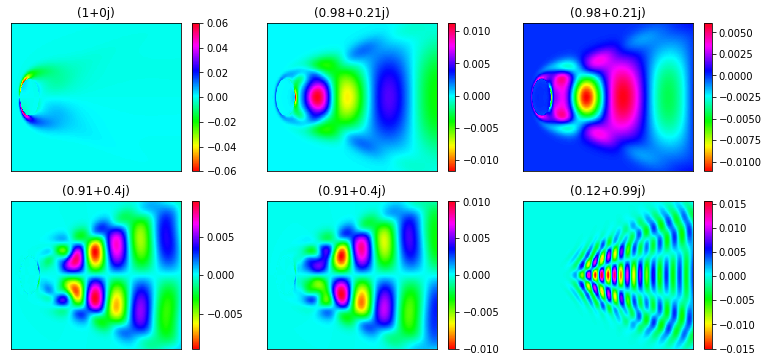

In [110]:
Z_v_ge, L_v_ge, _= GEDMD(vort[:,:N], vort[:,1:N+1], k=44)
#print(L_v)
fig, axs = plt.subplots(2, 3, figsize=(13, 6))
koji_z=[0, 1, 1, 3, 3, 13]
for i in range(6):
    if(i not in [2,4]):
        c=axs[i//3,i%3].pcolormesh(x_os[:-1], y_os[:-1], np.real(Z_v_ge[:,koji_z[i]]).reshape((-1,199)).T, cmap='hsv')
    else:
        c=axs[i//3,i%3].pcolormesh(x_os[:-1], y_os[:-1], np.imag(Z_v_ge[:,koji_z[i]]).reshape((-1,199)).T, cmap='hsv')
    plt.colorbar(c, ax=axs[i//3, i%3], orientation='vertical')
    axs[i//3,i%3].set_xticks([])
    axs[i//3,i%3].set_yticks([])
    axs[i//3, i%3].set_title(np.around(L_v_ge[koji_z[i]],2))
plt.show()

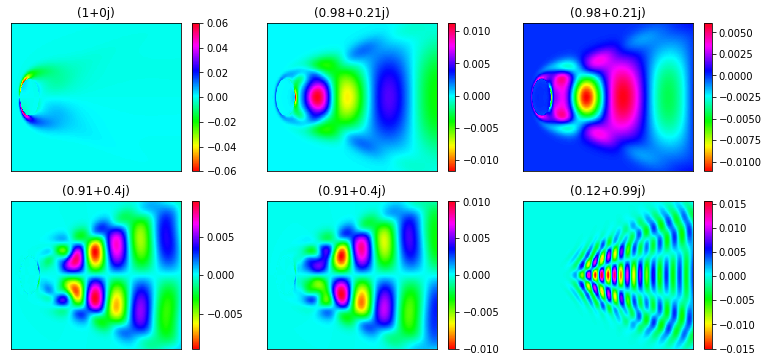

In [111]:
Z_v_qr, L_v_qr, r, Q, R= GEDMDQ(vort, k=44)
#print(L_v)
fig, axs = plt.subplots(2, 3, figsize=(13, 6))
koji_z=[0, 1, 1, 3, 3, 13]
for i in range(6):
    if(i not in [2,4]):
        c=axs[i//3,i%3].pcolormesh(x_os[:-1], y_os[:-1], np.real(Z_v_qr[:,koji_z[i]]).reshape((-1,199)).T, cmap='hsv')
    else:
        c=axs[i//3,i%3].pcolormesh(x_os[:-1], y_os[:-1], np.imag(Z_v_qr[:,koji_z[i]]).reshape((-1,199)).T, cmap='hsv')
    plt.colorbar(c, ax=axs[i//3, i%3], orientation='vertical')
    axs[i//3,i%3].set_xticks([])
    axs[i//3,i%3].set_yticks([])
    axs[i//3, i%3].set_title(np.around(L_v_qr[koji_z[i]],2))
plt.show()

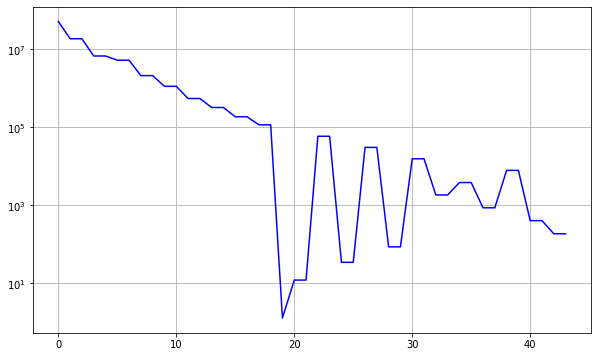

In [112]:
plt.show()
plt.figure(figsize=(10, 6))
plt.plot(1/r, marker='', linestyle='-', color='b')
plt.yscale('log')  # Set y-axis to logarithmic scale
plt.grid(True)
plt.show()

#ovdje r i opada za razliku od ostalih..
# na neki nacin ocekivano da 1/r veci (tj r manji) za ove koji prvi??

In [113]:
threshold=10**3/2
indices = np.where(1/r > threshold)[0]
print(indices, indices.shape)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 22 23 26 27 30
 31 32 33 34 35 36 37 38 39] (33,)


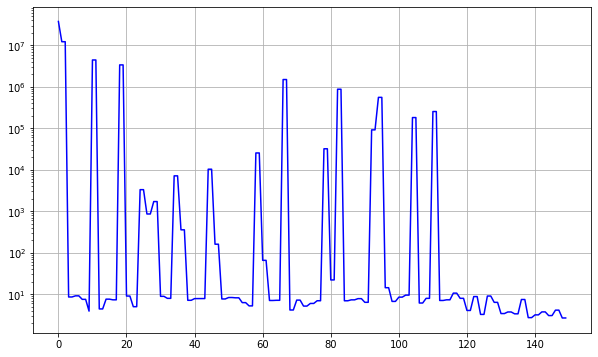

In [114]:
Z_v_qr_150, L_v_qr_150, r_150, Q_150, R_150= GEDMDQ(vort, k=150)
#print(L_v)
plt.show()
plt.figure(figsize=(10, 6))
plt.plot(1/r_150, marker='', linestyle='-', color='b')
plt.yscale('log')  # Set y-axis to logarithmic scale
plt.grid(True)
plt.show()

In [115]:
threshold=10**3/2
#threshold=10**2/2
#threshold=0 
indices_150 = np.where(1/r_150 > threshold)[0]
print(indices_150, indices_150.shape)

"""threshold=5*10**(-6)
indices_150 = np.where(r_150 < threshold)[0]
print(indices_150, indices_150.shape)"""

[  0   1   2  10  11  18  19  24  25  26  27  28  29  34  35  44  45  58
  59  66  67  78  79  82  83  92  93  94  95 104 105 110 111] (33,)


'threshold=5*10**(-6)\nindices_150 = np.where(r_150 < threshold)[0]\nprint(indices_150, indices_150.shape)'

In [116]:
Z_rec, L_rec, alpha = DMD_alpha_for_reconstruction(vort[:,:-1],Z_v_qr, indices, L_v_qr)
print(Z_rec.shape, L_rec.shape, alpha.shape)
print((L_rec*alpha).shape)
print(np.imag(alpha))

(89351, 33) (33,) (33,)
(33,)
[ 1.48028031e-18  1.01589333e+02 -1.01589333e+02  3.74567893e+01
 -3.74567893e+01  7.57412265e+00 -7.57412265e+00  1.09745727e+01
 -1.09745727e+01  1.08843275e+00 -1.08843275e+00 -2.98732553e+00
  2.98732553e+00 -7.60720070e-02  7.60720070e-02  1.00009934e+00
 -1.00009934e+00  2.54587567e-01 -2.54587567e-01  1.40036383e-01
 -1.40036383e-01  9.93730527e-02 -9.93730527e-02 -7.51435769e-02
  7.51435769e-02  9.36476655e-03 -9.36476655e-03 -1.71567954e-03
  1.71567954e-03 -4.16855356e-03  4.16855356e-03  3.29811259e-02
 -3.29811259e-02]


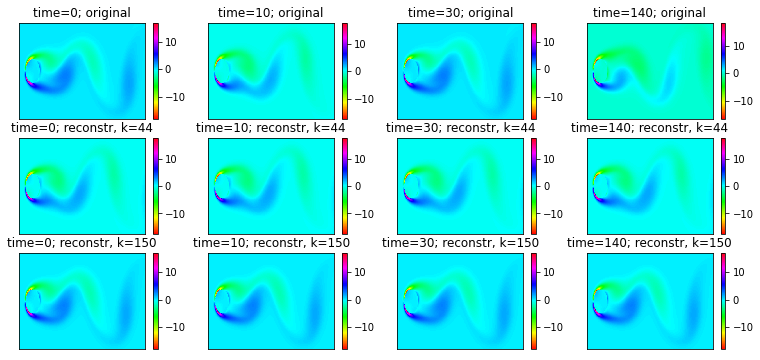

In [125]:
koji_rek=[0,10,30,140]
reconstructed  = np.array([DMD_reconstruction(vort[:,:-1],Z_v_qr, indices, L_v_qr, koji_rek[i]) for i in range(4)])

reconstructed_150  = np.array([DMD_reconstruction(vort[:,:-1],Z_v_qr_150, indices_150, L_v_qr_150, koji_rek[i]) for i in range(4)])


fig, axs = plt.subplots(3, 4, figsize=(13, 6))
for j in range(4):
    i=0
    c=axs[i,j].pcolormesh(x_os[:-1], y_os[:-1], vort[:,koji_rek[j]].reshape((-1,199)).T, cmap='hsv')
    plt.colorbar(c, ax=axs[i,j], orientation='vertical')
    axs[i,j].set_xticks([])
    axs[i,j].set_yticks([])
    axs[i,j].set_title("time={0}; original".format(koji_rek[j]))

    i=1
    c=axs[i,j].pcolormesh(x_os[:-1], y_os[:-1], np.real(reconstructed[i,:]).reshape((-1,199)).T, cmap='hsv')
    plt.colorbar(c, ax=axs[i,j], orientation='vertical')
    axs[i,j].set_xticks([])
    axs[i,j].set_yticks([])
    axs[i,j].set_title("time={}; reconstr, k=44".format(koji_rek[j]))

    i=2
    c=axs[i,j].pcolormesh(x_os[:-1], y_os[:-1], np.real(reconstructed_150[i,:]).reshape((-1,199)).T, cmap='hsv')
    plt.colorbar(c, ax=axs[i,j], orientation='vertical')
    axs[i,j].set_xticks([])
    axs[i,j].set_yticks([])
    axs[i,j].set_title("time={}; reconstr, k=150".format(koji_rek[j]))
plt.show()

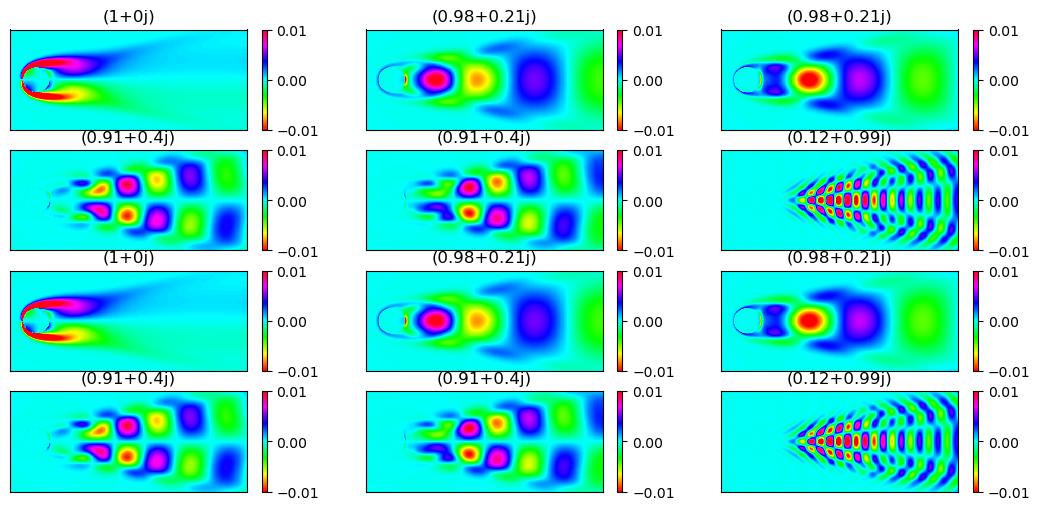

In [78]:
N_poc=100

_,_, _, Q, R= GEDMDQ(vort[:,:N_poc], k=44)

Z_1, L_1, _,Q,R = DMD_added_snap(vort[:,:N_poc], vort[:,N_poc:N_poc+5], Q, R, k=44) 
#ako ovdje (gore) ne dam k parametar, u ovoj fji ulazi u GEDMD gdje će odrediti najbolji k nekom od metoda..
#bez k, uzme novi k = 104.. pa L_1 i L_odmah imaju razlicite dimenzije..

Z_odmah, L_odmah, _,_,_ = GEDMDQ(vort[:,:N_poc+5], k=44)

fig, axs = plt.subplots(4, 3, figsize=(13, 6))
koji_z=[0, 1, 1, 3, 3, 13]
#koji_z=[14, 16,16, 19, 19, 20]
#koji_z = [35, 37, 37, 40, 40, 43]
for i in range(6):
    if(i not in [2,4]):
        c=axs[i//3,i%3].pcolormesh(x_os[:-1], y_os[:-1], np.real(Z_1[:,koji_z[i]]).reshape((-1,199)).T, cmap='hsv', vmin=-0.01, vmax=0.01)
    else:
        c=axs[i//3,i%3].pcolormesh(x_os[:-1], y_os[:-1], np.imag(Z_1[:,koji_z[i]]).reshape((-1,199)).T, cmap='hsv', vmin=-0.01, vmax=0.01)
    plt.colorbar(c, ax=axs[i//3, i%3], orientation='vertical')
    axs[i//3,i%3].set_xticks([])
    axs[i//3,i%3].set_yticks([])
    axs[i//3, i%3].set_title(np.around(L_1[koji_z[i]],2))
for i in range(6,12):
    if(i not in [8,10]):
        c=axs[i//3,i%3].pcolormesh(x_os[:-1], y_os[:-1], np.real(Z_odmah[:,koji_z[i-6]]).reshape((-1,199)).T, cmap='hsv', vmin=-0.01, vmax=0.01)
    else:
        c=axs[i//3,i%3].pcolormesh(x_os[:-1], y_os[:-1], np.imag(Z_odmah[:,koji_z[i-6]]).reshape((-1,199)).T, cmap='hsv', vmin=-0.01, vmax=0.01)
    plt.colorbar(c, ax=axs[i//3, i%3], orientation='vertical')
    axs[i//3,i%3].set_xticks([])
    axs[i//3,i%3].set_yticks([])
    axs[i//3, i%3].set_title(np.around(L_odmah[koji_z[i-6]],2))
plt.show()

##dodavanje radi

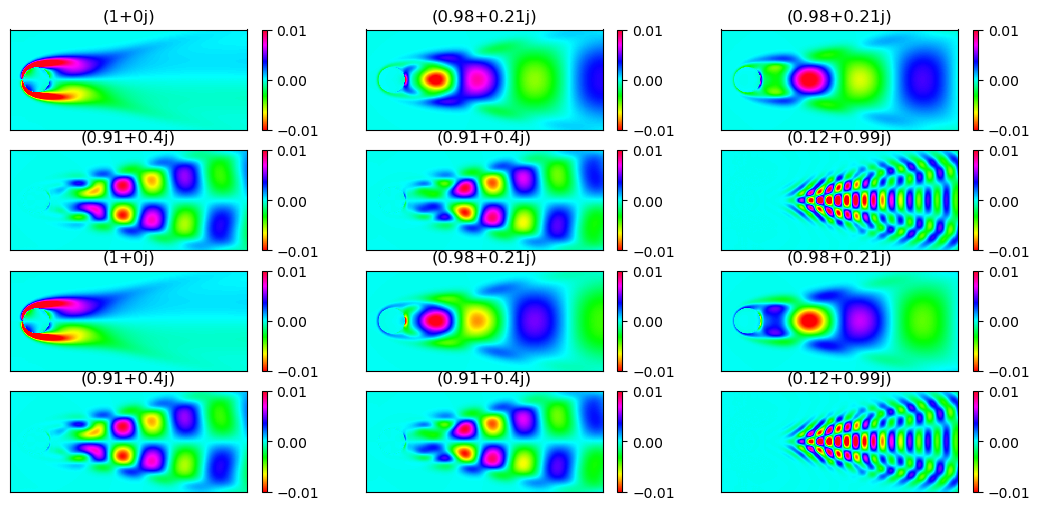

In [87]:
N_poc=100
l=5

_,_, _, Q, R= GEDMDQ(vort[:,:N_poc], k=44)

Z_1, L_1, _, _, _, _ = DMD_discarding_snap(l, Q, R, k=44)

Z_odmah, L_odmah, _,_,_ = GEDMDQ(vort[:,l:N_poc], k=44)

fig, axs = plt.subplots(4, 3, figsize=(13, 6))
koji_z=[0, 1, 1, 3, 3, 13]
#koji_z=[14, 16,16, 19, 19, 20]
#koji_z = [35, 37, 37, 40, 40, 43]
for i in range(6):
    if(i not in [2,4]):
        c=axs[i//3,i%3].pcolormesh(x_os[:-1], y_os[:-1], np.real(Z_1[:,koji_z[i]]).reshape((-1,199)).T, cmap='hsv', vmin=-0.01, vmax=0.01)
    else:
        c=axs[i//3,i%3].pcolormesh(x_os[:-1], y_os[:-1], np.imag(Z_1[:,koji_z[i]]).reshape((-1,199)).T, cmap='hsv', vmin=-0.01, vmax=0.01)
    plt.colorbar(c, ax=axs[i//3, i%3], orientation='vertical')
    axs[i//3,i%3].set_xticks([])
    axs[i//3,i%3].set_yticks([])
    axs[i//3, i%3].set_title(np.around(L_1[koji_z[i]],2))
for i in range(6,12):
    if(i not in [8,10]):
        c=axs[i//3,i%3].pcolormesh(x_os[:-1], y_os[:-1], np.real(Z_odmah[:,koji_z[i-6]]).reshape((-1,199)).T, cmap='hsv', vmin=-0.01, vmax=0.01)
    else:
        c=axs[i//3,i%3].pcolormesh(x_os[:-1], y_os[:-1], np.imag(Z_odmah[:,koji_z[i-6]]).reshape((-1,199)).T, cmap='hsv', vmin=-0.01, vmax=0.01)
    plt.colorbar(c, ax=axs[i//3, i%3], orientation='vertical')
    axs[i//3,i%3].set_xticks([])
    axs[i//3,i%3].set_yticks([])
    axs[i//3, i%3].set_title(np.around(L_odmah[koji_z[i-6]],2))
plt.show()

## oduzimanje isto radi:)

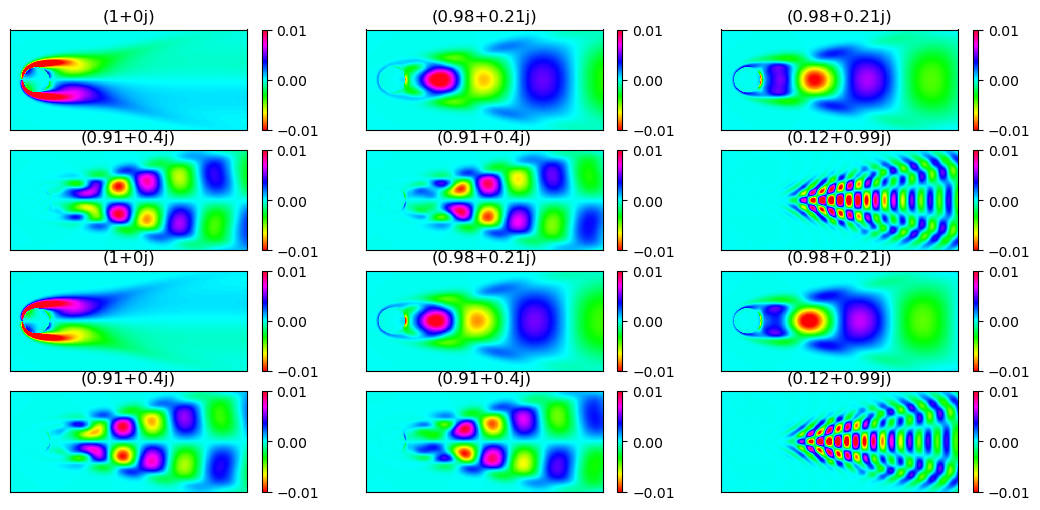

In [86]:
#dodavanje pa oduzimanje..

N_poc=100
l=5

_,_, _, Q, R= GEDMDQ(vort[:,:N_poc], k=44)

_,_, _,Q,R = DMD_added_snap(vort[:,:N_poc], vort[:,N_poc:N_poc+5], Q, R, k=44) 

Z_1, L_1, _, _, _, _ = DMD_discarding_snap(l, Q, R, k=44)

Z_odmah, L_odmah, _,_,_ = GEDMDQ(vort[:,l:N_poc], k=44)

fig, axs = plt.subplots(4, 3, figsize=(13, 6))
koji_z=[0, 1, 1, 3, 3, 13]
#koji_z=[14, 16,16, 19, 19, 20]
#koji_z = [35, 37, 37, 40, 40, 43]
for i in range(6):
    if(i not in [2,4]):
        c=axs[i//3,i%3].pcolormesh(x_os[:-1], y_os[:-1], np.real(Z_1[:,koji_z[i]]).reshape((-1,199)).T, cmap='hsv', vmin=-0.01, vmax=0.01)
    else:
        c=axs[i//3,i%3].pcolormesh(x_os[:-1], y_os[:-1], np.imag(Z_1[:,koji_z[i]]).reshape((-1,199)).T, cmap='hsv', vmin=-0.01, vmax=0.01)
    plt.colorbar(c, ax=axs[i//3, i%3], orientation='vertical')
    axs[i//3,i%3].set_xticks([])
    axs[i//3,i%3].set_yticks([])
    axs[i//3, i%3].set_title(np.around(L_1[koji_z[i]],2))
for i in range(6,12):
    if(i not in [8,10]):
        c=axs[i//3,i%3].pcolormesh(x_os[:-1], y_os[:-1], np.real(Z_odmah[:,koji_z[i-6]]).reshape((-1,199)).T, cmap='hsv', vmin=-0.01, vmax=0.01)
    else:
        c=axs[i//3,i%3].pcolormesh(x_os[:-1], y_os[:-1], np.imag(Z_odmah[:,koji_z[i-6]]).reshape((-1,199)).T, cmap='hsv', vmin=-0.01, vmax=0.01)
    plt.colorbar(c, ax=axs[i//3, i%3], orientation='vertical')
    axs[i//3,i%3].set_xticks([])
    axs[i//3,i%3].set_yticks([])
    axs[i//3, i%3].set_title(np.around(L_odmah[koji_z[i-6]],2))
plt.show()


In [14]:
"""#sa obje brzine i vorticity
S = np.concatenate((u, v, vort), axis=0)
N=S.shape[1]
Z, L= DMD(S[:,:N-1], S[:,1:N], k=44)
Z.shape
L

plt.figure()
koji_z=0
q = plt.quiver(x_os_2, y_os_2, Z[:nx*ny,koji_z], Z[nx*ny:nx*ny*2,koji_z], np.real(Z[nx*ny*2:,koji_z]), cmap='hsv', scale=5)
q.set_clim(-0.02, 0.02)
cb = plt.colorbar(q)
cb.set_label('vorticity')
plt.show()

plt.figure()
q = plt.quiver(x_os_2, y_os_2, Z[:nx*ny,koji_z], Z[nx*ny:nx*ny*2,koji_z], np.imag(Z[nx*ny*2:,koji_z]), cmap='hsv', scale=1)
q.set_clim(-0.005, 0.005)
cb = plt.colorbar(q)
cb.set_label('vorticity')
plt.show()"""

"#sa obje brzine i vorticity\nS = np.concatenate((u, v, vort), axis=0)\nN=S.shape[1]\nZ, L= DMD(S[:,:N-1], S[:,1:N], k=44)\nZ.shape\nL\n\nplt.figure()\nkoji_z=0\nq = plt.quiver(x_os_2, y_os_2, Z[:nx*ny,koji_z], Z[nx*ny:nx*ny*2,koji_z], np.real(Z[nx*ny*2:,koji_z]), cmap='hsv', scale=5)\nq.set_clim(-0.02, 0.02)\ncb = plt.colorbar(q)\ncb.set_label('vorticity')\nplt.show()\n\nplt.figure()\nq = plt.quiver(x_os_2, y_os_2, Z[:nx*ny,koji_z], Z[nx*ny:nx*ny*2,koji_z], np.imag(Z[nx*ny*2:,koji_z]), cmap='hsv', scale=1)\nq.set_clim(-0.005, 0.005)\ncb = plt.colorbar(q)\ncb.set_label('vorticity')\nplt.show()"